# 주제 : 프로그래밍 언어별 출판되는 책을 통해 인기있는 언어 찾기

---

## 1. 데이터 준비

### 1-1. 필요한 모듈 불러오기

In [1]:
import os
import sys
import urllib.request
import json 
import pandas as pd

### [ 문제 1번 ] 1-2. Naver Books API 호출을 통한 정보 수집 

In [2]:
%set_env CLIENT_ID = uAbavg012XaXAEn8gVKz
%set_env CLIENT_SECRET = lMjPL4LlAk

env: CLIENT_ID=uAbavg012XaXAEn8gVKz
env: CLIENT_SECRET=lMjPL4LlAk


In [3]:
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [4]:
client_id

'uAbavg012XaXAEn8gVKz'

In [5]:
# 검색 URL 생성 함수
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [6]:
# 검색 결과 수집 함수
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)

    return json.loads(response.read().decode("utf-8"))

### 1-3. 데이터 정제 및 데이터프레임 구성

In [7]:
# b태그 제거 함수
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [8]:
# 판다스 데이터프레임 변환 함수
def get_fields(json_data):
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    author = [delete_tag(each["author"]) for each in json_data["items"]]
    publisher = [delete_tag(each["publisher"]) for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    
    result_pd = pd.DataFrame({
        "제목":title,
        "저자":author,
        "출판사":publisher,
        "출판일": pubdate,
        "ISBN":isbn
    }, columns=["제목", "저자", "출판사", "출판일", "ISBN"])
    
    return result_pd

In [9]:
df = pd.DataFrame({
    "제목": [],
    "저자": [],
    "출판사": [],
    "출판일": [],
    "ISBN": [],
    "언어":[]
})

In [10]:
# 데이터셋 구성 함수
def make_dataset(language):
    url = gen_search_url("book", language, 1, 20)
    one_result = get_result_onpage(url)
    result = get_fields(one_result)
    result["언어"] = language
    
    return result

In [11]:
arr = ['파이썬','Python','C언어','Java','C++','C#','Visual Basic','자바스크립트','SQL','PHP','R프로그래밍']

for name in arr:
    tmp = make_dataset(name)
    df = pd.concat([df, tmp])

In [12]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,파이썬
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,파이썬
2,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,파이썬
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,파이썬
4,파이썬 무작정 따라하기 (미래의 프로그래머를 위한),송석리|서승희,길벗,20211220,1165217899 9791165217891,파이썬


In [13]:
df.tail()

,제목,저자,출판사,출판일,ISBN,언어
15,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R프로그래밍
16,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),박성호|문경희|양자영|이윤정|조미숙,부산대학교출판문화원,20210831,8973167197 9788973167197,R프로그래밍
17,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R프로그래밍
18,R을 이용한 빅데이터 분석 및 활용 Part 1. R 프로그래밍과 데이터 시각화,허진경,퍼플,20171024,0000291986 1400000291986,R프로그래밍
19,효율적인 R 프로그래밍,로빈 러브 레이스,느린생각,20181101,1187139173 9791187139171,R프로그래밍


In [14]:
df["언어"].unique()

array(['파이썬', 'Python', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic',
       '자바스크립트', 'SQL', 'PHP', 'R프로그래밍'], dtype=object)

In [15]:
df.loc[df["언어"] == "파이썬", "언어"] = "Python"
df.loc[df["언어"] == "C언어", "언어"] = "C"
df.loc[df["언어"] == "자바스크립트", "언어"] = "JavaScript"
df.loc[df["언어"] == "R프로그래밍", "언어"] = "R"

In [16]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
2,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,파이썬 무작정 따라하기 (미래의 프로그래머를 위한),송석리|서승희,길벗,20211220,1165217899 9791165217891,Python


In [17]:
df["언어"].unique()

array(['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript',
       'SQL', 'PHP', 'R'], dtype=object)

In [18]:
df = df.reset_index(drop=True)
df

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
2,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,파이썬 무작정 따라하기 (미래의 프로그래머를 위한),송석리|서승희,길벗,20211220,1165217899 9791165217891,Python
...,...,...,...,...,...,...
215,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R
216,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),박성호|문경희|양자영|이윤정|조미숙,부산대학교출판문화원,20210831,8973167197 9788973167197,R
217,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R
218,R을 이용한 빅데이터 분석 및 활용 Part 1. R 프로그래밍과 데이터 시각화,허진경,퍼플,20171024,0000291986 1400000291986,R


###  [ 문제 2번 ] 1-4. 중복 데이터 제거

In [19]:
len(df["ISBN"].unique())

217

In [20]:
df.drop_duplicates(subset='ISBN', keep='first', inplace=True, ignore_index=False)

In [21]:
df = df.reset_index(drop=True)
df

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
2,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,파이썬 무작정 따라하기 (미래의 프로그래머를 위한),송석리|서승희,길벗,20211220,1165217899 9791165217891,Python
...,...,...,...,...,...,...
212,R 프로그래밍 및 그래픽스 실습,손영숙|전성현,자유아카데미,20180831,1158082002 9791158082000,R
213,R언어 프로그래밍 (컴퓨터 비정공자를 위한 빅데이터 활용의 시작),박성호|문경희|양자영|이윤정|조미숙,부산대학교출판문화원,20210831,8973167197 9788973167197,R
214,R 프로그래밍 기초 & 활용 (데이터 분석과 통계 프로그래밍을 위한),래리 페이스,길벗,20130204,8966185231 9788966185238,R
215,R을 이용한 빅데이터 분석 및 활용 Part 1. R 프로그래밍과 데이터 시각화,허진경,퍼플,20171024,0000291986 1400000291986,R


## [ 문제 3번 ] 2. 데이터 시각화

In [22]:
language = ['파이썬', 'C언어', 'Java', 'C++', 'C#', 'Visual Basic','자바스크립트', 'SQL', 'PHP', 'R프로그래밍']
book_category = ['Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic','JavaScript', 'SQL', 'PHP', 'R']
book_count = []

def count_books(language):
    url = gen_search_url("book", language, 1, 20)
    one_result = get_result_onpage(url)
    book_count.append(one_result["total"])

for name in language:
    count_books(name)
    
book_count

[1433, 16036, 16643, 7930, 3541, 8454, 2040, 10405, 17946, 583]

In [23]:
df_book_count = pd.DataFrame(list(zip(book_category,book_count)), columns = ['언어','출판물 수'])
df_book_count

,언어,출판물 수
0,Python,1433
1,C,16036
2,Java,16643
3,C++,7930
4,C#,3541
5,Visual Basic,8454
6,JavaScript,2040
7,SQL,10405
8,PHP,17946
9,R,583


### 2-1. 각 언어별 출판물 순위

In [24]:
df_book_sorted = df_book_count.sort_values('출판물 수', ascending=False).copy()
df_book_sorted = df_book_sorted.reset_index(drop=True)
df_book_sorted.index = df_book_sorted.index+1
df_book_sorted

,언어,출판물 수
1,PHP,17946
2,Java,16643
3,C,16036
4,SQL,10405
5,Visual Basic,8454
6,C++,7930
7,C#,3541
8,JavaScript,2040
9,Python,1433
10,R,583


### 2-2. 출판물 순위 시각화

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family="Arial Unicode MS")
get_ipython().run_line_magic('matplotlib', 'inline')

<AxesSubplot:xlabel='언어', ylabel='출판물 수'>

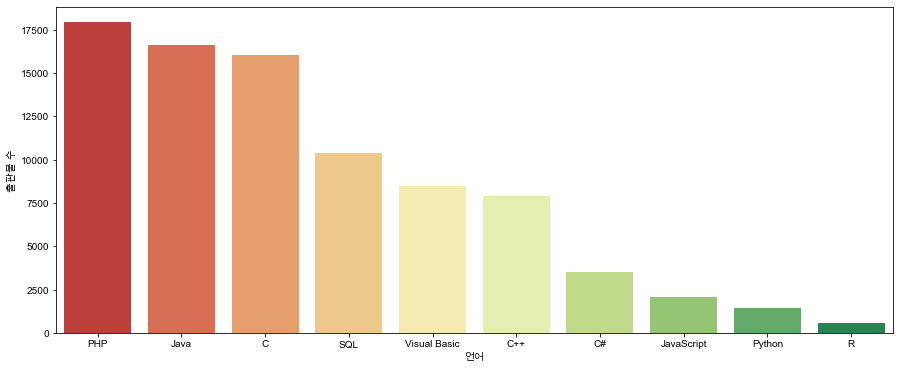

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_book_sorted, x='언어', y='출판물 수', palette="RdYlGn")

In [27]:
df.head()

,제목,저자,출판사,출판일,ISBN,언어
0,이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...,나동빈,한빛미디어,20200805,1162243074 9791162243077,Python
1,혼자 공부하는 파이썬 (파이썬 최신 버전 반영),윤인성,한빛미디어,20190610,1162241888 9791162241882,Python
2,Do it! 점프 투 파이썬,박응용,이지스퍼블리싱,20190620,1163030910 9791163030911,Python
3,파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트),박상길,책만,20200715,1189909170 9791189909178,Python
4,파이썬 무작정 따라하기 (미래의 프로그래머를 위한),송석리|서승희,길벗,20211220,1165217899 9791165217891,Python


### [ 문제 4번 ] 2-3. 우리나라의 컴퓨터 언어 관련 출판사 순위 확인

In [28]:
df['출판사'].unique()

array(['한빛미디어', '이지스퍼블리싱', '책만', '길벗', '위키북스', '파이스탁', '비제이퍼블릭', '가메',
       '영진닷컴', 'McGraw-HillEducation', '성안당', 'Apress', '청람', '보국출판사',
       "O'ReillyMedia", '제이펍', '인피니티북스', 'fabiogasparella', 'Springer',
       'AuerbachPublications', 'PacktPublishingLimited', '秀和システム', '북넷',
       '翔泳社', '생능출판', '복두출판사', '삼양미디어', '휴먼싸이언스', '디지털북스', '도우출판', '프리렉',
       '부산대학교출판문화원', '광문각', '생능출판사', '인사이트', '오렌지미디어',
       'SpringerFachmedienWiesbaden', '이한미디어', 'マイナビ出版',
       'BPBPublications', '정보문화사', '프로텍미디어', '에이콘출판', '오일러BOOKS',
       '한빛아카데미', '성안북스', '책밥상', '북스홀릭퍼블리싱', '교학사', '이한출판사', '사이버출판사',
       'ForDummies', '지코사이언스', '인터비젼', '기한재', '삼각형', 'Wiley-IEEEPress',
       'JohnWiley&Sons', '중앙교육진흥연구소', '인포앤북', '다락원', '한국데이터진흥원',
       '한국데이터산업진흥원', '앤써북', '디비안(DBian)', '책밥', 'PHP硏究所', '남가람북스',
       'インプレス', 'BOOKK(부크크)', '자유아카데미', '황소걸음아카데미', '혜지원', '느린생각',
       '내하출판사', '퍼플'], dtype=object)

In [29]:
len(df['출판사'].unique())

76

In [30]:
df['출판사'].value_counts().head(10)

한빛미디어      29
길벗         17
위키북스       13
PHP硏究所      9
이지스퍼블리싱     9
생능출판        8
성안당         8
에이콘출판       7
Apress      6
인피니티북스      5
Name: 출판사, dtype: int64

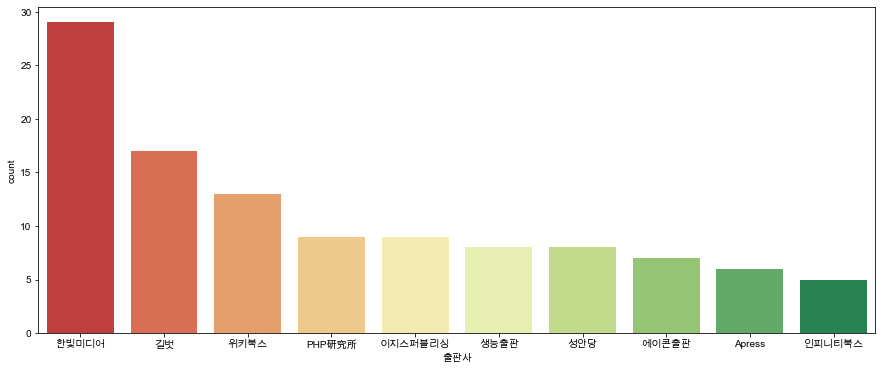

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df["출판사"], 
    data=df,
    palette="RdYlGn",
    order=df["출판사"].value_counts().head(10).index
)
plt.show()

### [ 문제 5번 ] 2-4.  2020년-2021년 데이터와 2017-2019년 데이터 비교

In [32]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      217 non-null    object
 1   저자      217 non-null    object
 2   출판사     217 non-null    object
 3   출판일     217 non-null    object
 4   ISBN    217 non-null    object
 5   언어      217 non-null    object
dtypes: object(6)
memory usage: 10.3+ KB


In [33]:
# 이상치 수정
df.loc[df['출판일'] == '20211000', '출판일'] = '20210909'

In [34]:
# 데이터 타입을 문자열 => 날짜 타입으로 변경
df['출판일'] = pd.to_datetime(df['출판일'])

ParserError: day is out of range for month: 20211200

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df[df['출판일'] >= '2020-01-01']

#### 2020-2021년 프로그래밍 언어별 출판물 데이터 시각화

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df[df['출판일'] >= '2020-01-01']['언어'], 
    data=df,
    palette="RdYlGn",
    order=df[df['출판일'] >= '2020-01-01']['언어'].value_counts().index
)
plt.show()

In [ ]:
df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]

#### 2017-2019년 프로그래밍 언어별 출판물수 시각화 

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(
    x=df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]['언어'], 
    data=df,
    palette="RdYlGn",
    order=df[(df['출판일'] >= '2017-01-01') & (df['출판일'] <= '2019-12-31')]['언어'].value_counts().index
)
plt.show()

## 3. 정리 및 결론

- 분석 데이터는 각 언어별 상위 20권의 책을 기준으로 Naver 책 검색 API를 통해 수집하였습니다.
- 수집 대상 데이터를 각 언어별 상위 20권으로 제한한 것은, 검색 결과의 첫 페이지에 나타나는 20권의 책이 사람들이 실질적으로 구매할만한 도서 후보군이라고 판단했기 때문입니다.
- 컴퓨터 프로그래밍 언어별 출판물 수는 PHP, Java, C언어 순으로 많았습니다.
- 출판물 양을 기준으로 한 우리나라의 컴퓨터 언어 관련 출판사 순위는 한빛미디어, 길벗, 위키북스 순으로 나타났습니다.
- 전체 데이터를 2020년을 기준으로 분류했을 때, 2020-2021년 사이에 출판물이 많았던 언어는 파이썬, PHP, C#이었습니다. 
- 2017년부터 2019년 사이에 많이 출판된 프로그래밍 언어가 R, C언어, Java였던 것을 고려하면 최근 2년 사이에 인기있는 프로그래밍 언어 순위에 커다란 변화가 있었음을 알 수 있습니다.

| 언어   | 2017-2019년 순위    | 2020-2021년 순위 |
|------ |-------------------| ----------------|
| Python| 7위                | 1위 |
| C     | 2위                | 7위 |
| Java  | 3위                | 6위 |
| C++   | 4위                | 8위 |
| C#    | 6위                | 3위 |
| Visual Basic  | 9위        | 10위 |
| JavaScript  | 5위          | 5위 |
| SQL   | 8위                | 4위 |
| PHP   | 10위               | 2위 |
| R     | 1위                | 9위 |

- 특히 7위였던 파이썬이 1위로 올라서고, 10위였던 PHP가 2위로 급상승한 것이 가장 눈에 띄는 변화입니다.
- 기존에 1위였던 R이 최근 9위로 떨어지고, 2위였던 C언어가 7위로 추락한 것도 주목할만한 부분입니다.
- 비교적 배우기 어려운 C언어의 인기가 줄어든 것은 이해할만한 부분이지만, 데이터사이언스 분야의 대표적인 프로그래밍 언어인 R의 순위가 크게 떨어진 요인은 현재 데이터에서 추론하기 어렵습니다.
<br>
- 전체적인 출판물 수가 대폭 늘어난 것도 커다란 변화였습니다.
- 2017-2019년 순위에서 1등이었던 R의 출판물 수가 8건에 불과했던 반면, 2020-2021년 순위에서 1등인 파이썬의 경우 출판물 수가 35건에 달합니다.
- 2020-2021년 사이에는 5등 이상의 프로그래밍 언어 출판물이 모두 10건 이상인 것을 통해 추론했을 때, 출판 시장에 프로그래밍 언어 관련 책에 대한 수요가 그 만큼 늘어났다는 것을 알 수 있습니다.